# Descriptive statistics 
Dataset: Dataset of academic performance evolution for engineering students published April 18th 2020, collected by the Colombian Institute for the Evaluation of Education (ICFES) in xlsx format: **data_academic_performance.xlsx**

The following plots will be presented: 
- Number of individuals by gender
- Number of individuals by socio-economic level by attribute STRATUM
- Number of individuals by gender&socio-economic level


- Distribution of grades by gender (before and after college)
- Distribution of grades by socio-economic-level (before and after college)
- Distribution of grades by gender&socio-economic level (before and after college)


- Matrix showing the Pearson correlation between grades (before), grades (after), gender, socio-economic level
- Scatter-plot showing the correlation between grades before vs after college. 


The plots can be visualized for standardized, normalized or raw data. Change the df configuration accordingly. 

## Load packages

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import matplotlib as mpl
import numpy as np

## Plots setup

In [2]:
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (7,2.5)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

## Load dataset

In [5]:
# df = pd.read_csv("df_sum_score_ex.csv")
df 
# df_norm = pd.read_csv("df_sum_score_norm.csv")
# df_stand = pd.read_csv("df_sum_score_stand.csv")

# TODO disse csv'er skal laves i data, så de kan loades her

,Unnamed: 0,GENDER,STRATUM,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin
0,0,F,Stratum_4,PRIVATE,ACADEMIC,71,81,61,86,82,71,93,71,93,79,85.666667,74.666667,1
1,1,F,Stratum_5,PRIVATE,ACADEMIC,83,75,66,100,88,97,38,86,98,78,74.000000,76.333333,1
2,2,M,Stratum_2,PRIVATE,ACADEMIC,52,49,38,46,42,17,1,18,43,22,20.666667,43.000000,0
3,3,F,Stratum_2,PRIVATE,ACADEMIC,56,55,51,64,73,65,35,76,80,48,63.666667,59.666667,1
4,4,M,Stratum_4,PRIVATE,ACADEMIC,80,65,76,85,92,94,94,98,100,71,97.333333,77.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,12406,M,Stratum_2,PRIVATE,ACADEMIC,67,69,70,67,81,88,71,86,87,65,81.333333,73.333333,0
12407,12407,M,Stratum_2,PUBLIC,ACADEMIC,58,57,61,63,53,46,39,44,11,0,31.333333,57.000000,0
12408,12408,M,Stratum_2,PRIVATE,ACADEMIC,66,69,75,70,58,98,88,90,81,87,86.333333,67.333333,0
12409,12409,F,Stratum_3,PRIVATE,ACADEMIC,53,69,64,59,52,60,80,51,8,42,46.333333,61.666667,1


# Distributions

## Number of individuals by gender

In [4]:
# Skal rykkes til Data.ipynb
df = pd.read_csv('GUDF.csv')
df = df[df.STRATUM!='0']
# GUDF = pd.read_csv('GUDF.csv')


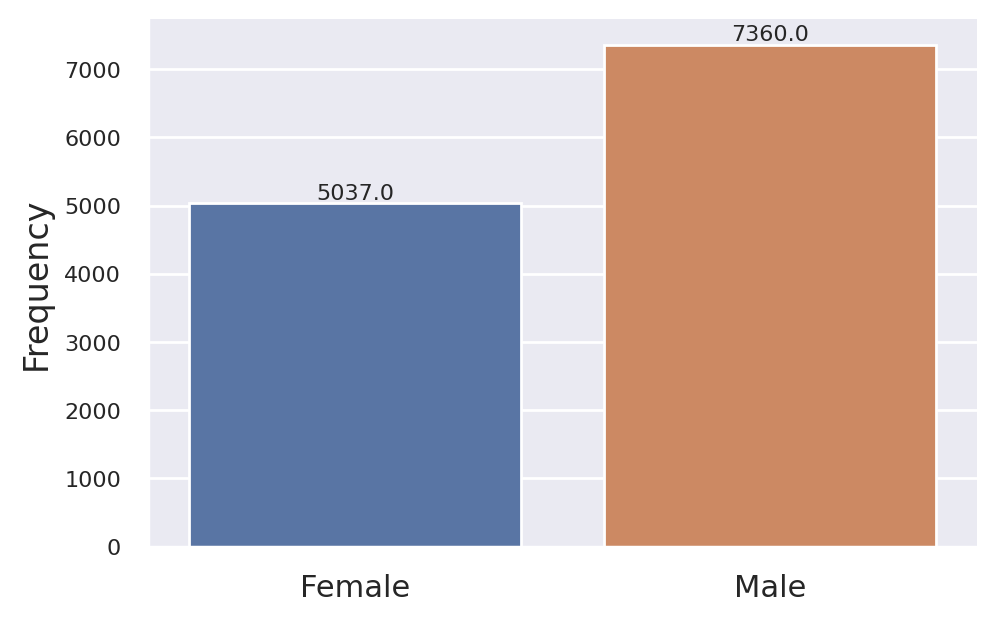

In [107]:
# df = pd.read_csv("df_sum_score_ex.csv")

g = sns.catplot(x='GENDER', data=df, kind='count', legend=True)
g.fig.set_size_inches(5, 3)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]

    ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)
ax.set_xlabel('', fontdict=None, labelpad=None)
ax.set_ylabel('Frequency', fontdict=None, labelpad=None)
ax.set_xticklabels(['Female','Male'])
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=8)

# Save as a SVG and PNG
plt.savefig("gender_amount.png")


## Number of individuals by gender & socio-economic level - barplot

In [108]:
# g = sns.catplot(x="STRATUM", kind="count",   data=df, legend=True, order=['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])
# g.fig.set_size_inches(5, 3)

# # extract the matplotlib axes_subplot objects from the FacetGrid
# ax = g.facet_axis(0, 0)

# # iterate through the axes containers
# for c in ax.containers:
#     labels = [f'{(v.get_height()):.1f}' for v in c]

#     ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)
# ax.set_xlabel('Socioeconomic levels', fontdict=None, labelpad=None)
# ax.set_ylabel('Frequency', fontdict=None, labelpad=None)
# ax.xaxis.set_tick_params(labelsize=8)
# ax.yaxis.set_tick_params(labelsize=8)

# # Save as a SVG and PNG
# plt.savefig("STRATUM_amount.png")
# #TODO TITLE

## Number of individuals by gender & socio-economic level - Stacked barplot

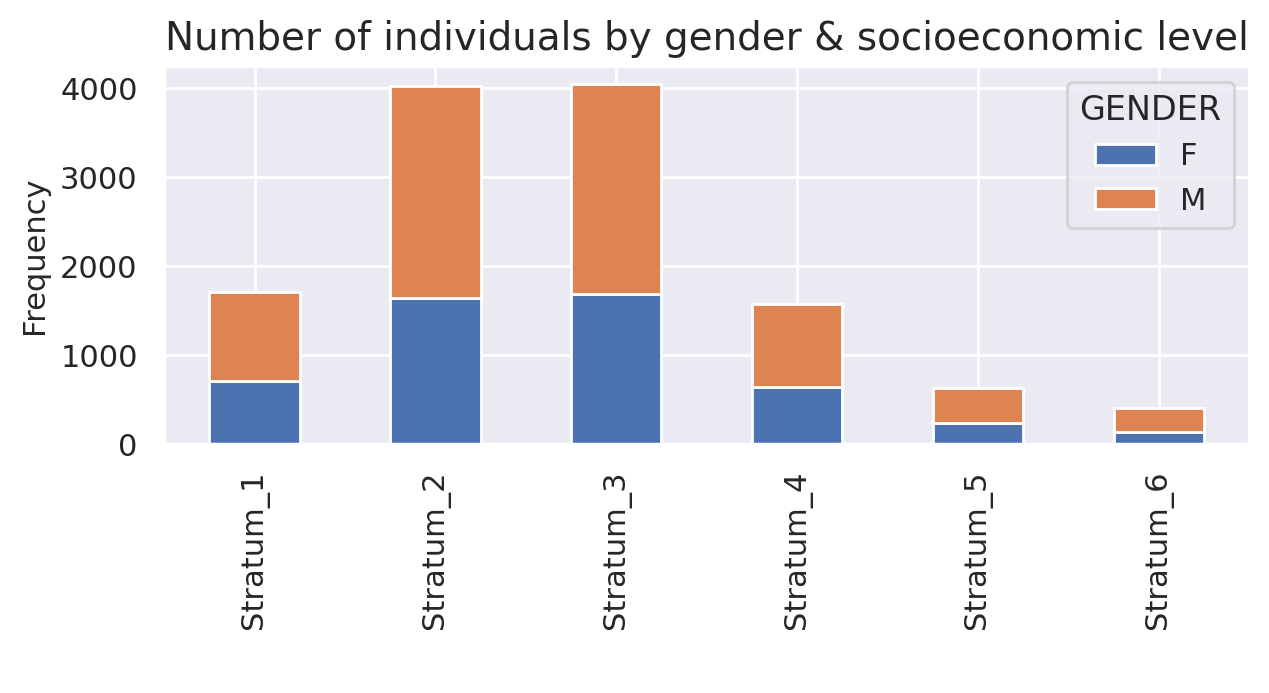

In [109]:
# Create dataframe of number of Males (M) and Females (F) by each stratum level

df_gen_soc = df.groupby(["STRATUM", "GENDER"]).size().reset_index().pivot(columns='GENDER', index='STRATUM', values=0)

# Stacked bar chart of the gender/stratum dataframe above
df_gen_soc.plot(kind='bar', stacked=True)
plt.title("Number of individuals by gender & socioeconomic level", size=14)
plt.ylabel("Frequency", size=11)
plt.xlabel(" ")

# Save as a SVG and PNG
plt.savefig("gender_STRATUM_amount.png",bbox_inches="tight")
plt.show()

## Men and women highschool and college grades average histograms 

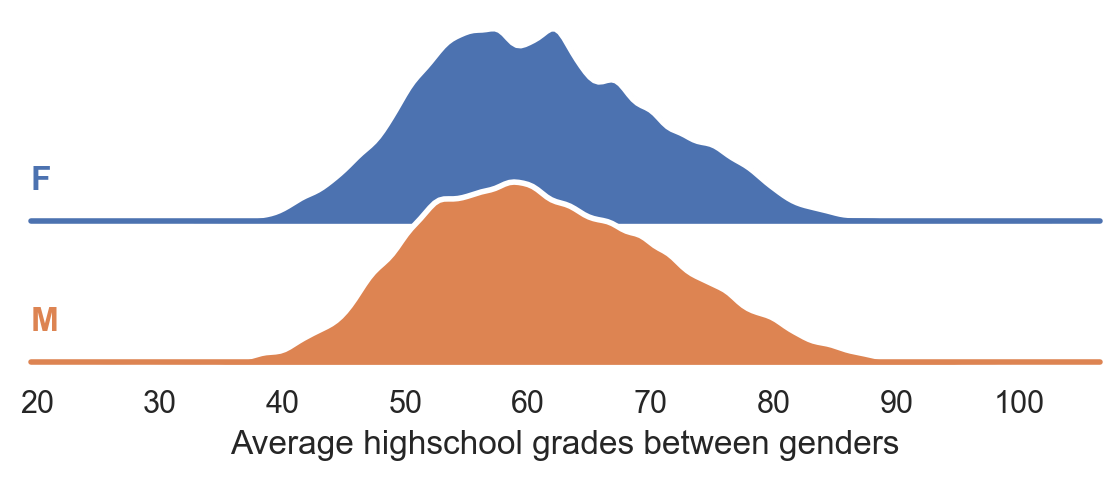

In [110]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# df = pd.read_csv("df_sum_score.csv")
# df = pd.read_csv("df_sum_score_ex.csv")
df = pd.read_csv("GUDF.csv")


def Ridgeline_dists(df,x, metric="",plot_label=""):
    
    df_temp = df.copy()
    x = x 
    g = df_temp.GENDER
    df_kat = pd.DataFrame(dict(x=x, g=g))
    df_kat_order = df_kat.groupby(["g"]).count()
    df_kat_order = df_kat_order.sort_values(by="x", ascending=False)

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
    g = sns.FacetGrid(
        df_kat,
        row="g",
        hue="g",
        aspect=10,
        height=0.8,
        # palette=pal # Denne gør den i de 2 blå farver
    )

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "x", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.2)
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            0,
            0.2,
            label,
            fontweight="bold",
            color=color,
            ha="left",
            va="center",
            transform=ax.transAxes
        )

    g.map(label, "x")

    g.set_xlabels(plot_label)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-0.30)
    g.fig.set_size_inches(6, 5)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    

Ridgeline_dists(df,x=df.HI_GRADE_AVG,plot_label='Average highschool grades between genders')
# plt.axvline(x=df.HI_GRADE_AVG[df.GENDER_bin == 1].median(),
#             color='blue',
#             marker='.', 
#             lw=1)
# plt.axvline(x=df.HI_GRADE_AVG[df.GENDER_bin == 0].median(),
#             color='sandybrown',
#             marker='.', 
#             lw=1)
# plt.axvline(x=np.quantile(df.HI_GRADE_AVG[df.GENDER_bin == 0], .75),
#             color='sandybrown',
#             ls='--', 
#             lw=1)
# plt.axvline(x=np.quantile(df.HI_GRADE_AVG[df.GENDER_bin == 1], .75),
#             color='blue',
#             ls='--', 
#             lw=1)
# plt.axvline(x=np.quantile(df.HI_GRADE_AVG[df.GENDER_bin == 0], .25),
#             color='sandybrown',
#             ls='--', 
#             lw=1)
# plt.axvline(x=np.quantile(df.HI_GRADE_AVG[df.GENDER_bin == 1], .25),
#             color='blue',
#             ls='dotted', 
#             lw=1)

# Save as a SVG and PNG
# plt.savefig("ridgeline_hi_grade.png")


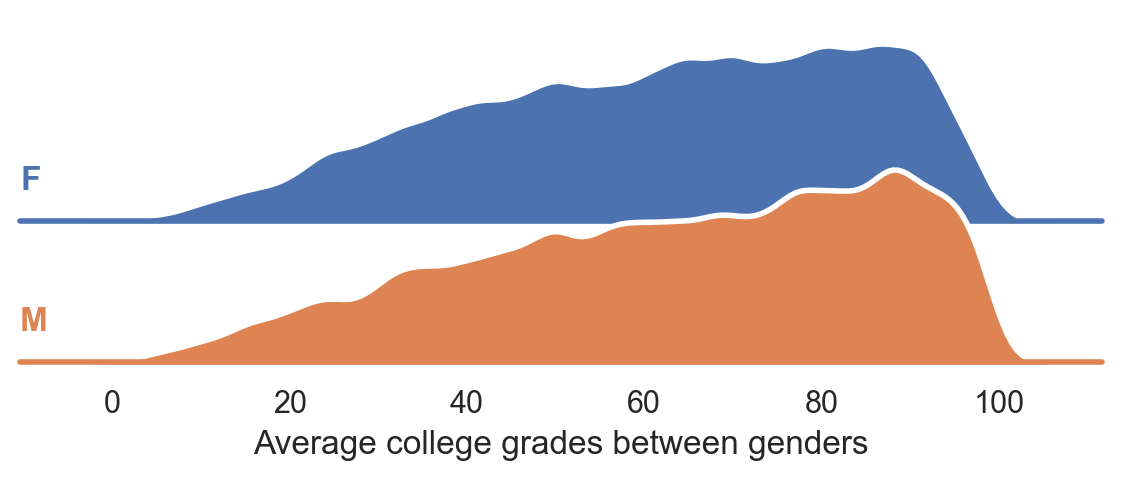

In [111]:
Ridgeline_dists(df,x=df.COL_GRADE_AVG,plot_label='Average college grades between genders')
# plt.axvline(x=df.COL_GRADE_AVG[df.GENDER_bin == 1].median(),
#             color='blue',
#             marker='.', 
#             lw=1)
# plt.axvline(x=df.COL_GRADE_AVG[df.GENDER_bin == 0].median(),
#             color='sandybrown',
#             marker='.', 
#             lw=1)
# plt.axvline(x=np.quantile(df.COL_GRADE_AVG[df.GENDER_bin == 0], .75),
#             color='sandybrown',
#             ls='--', 
#             lw=1)
# plt.axvline(x=np.quantile(df.COL_GRADE_AVG[df.GENDER_bin == 1], .75),
#             color='blue',
#             ls='--', 
#             lw=1)
# plt.axvline(x=np.quantile(df.COL_GRADE_AVG[df.GENDER_bin == 0], .25),
#             color='sandybrown',
#             ls='--', 
#             lw=1)
# plt.axvline(x=np.quantile(df.COL_GRADE_AVG[df.GENDER_bin == 1], .25),
#             color='blue',
#             ls='dotted', 
#             lw=1)
# Save as a SVG and PNG
# plt.savefig("ridgeline_col_grade.png")


## Men and women highschool and college grades average histograms

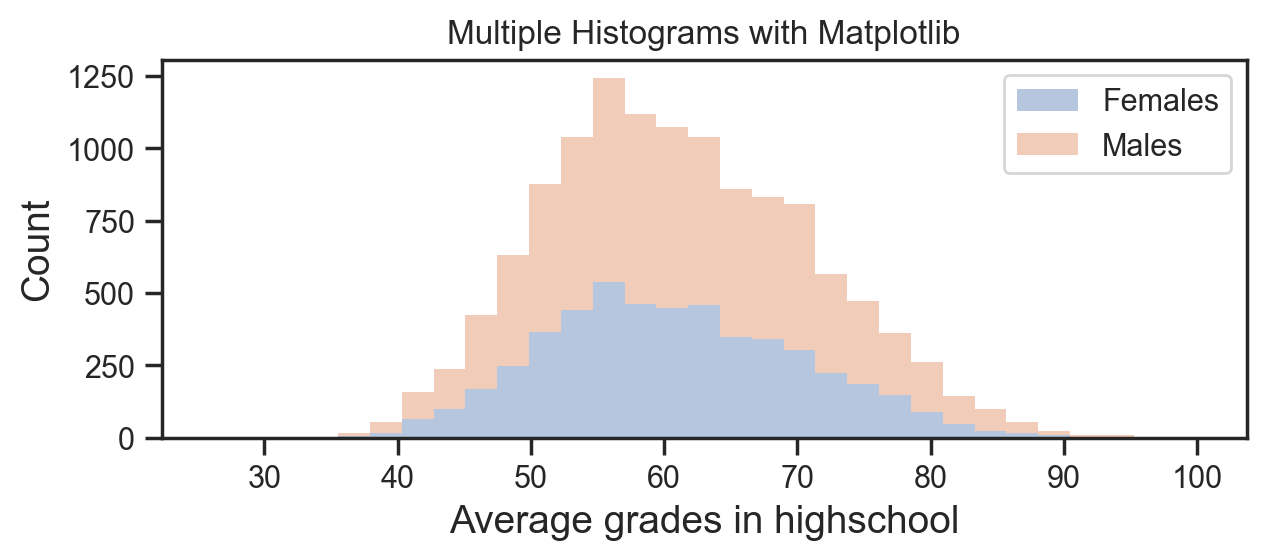

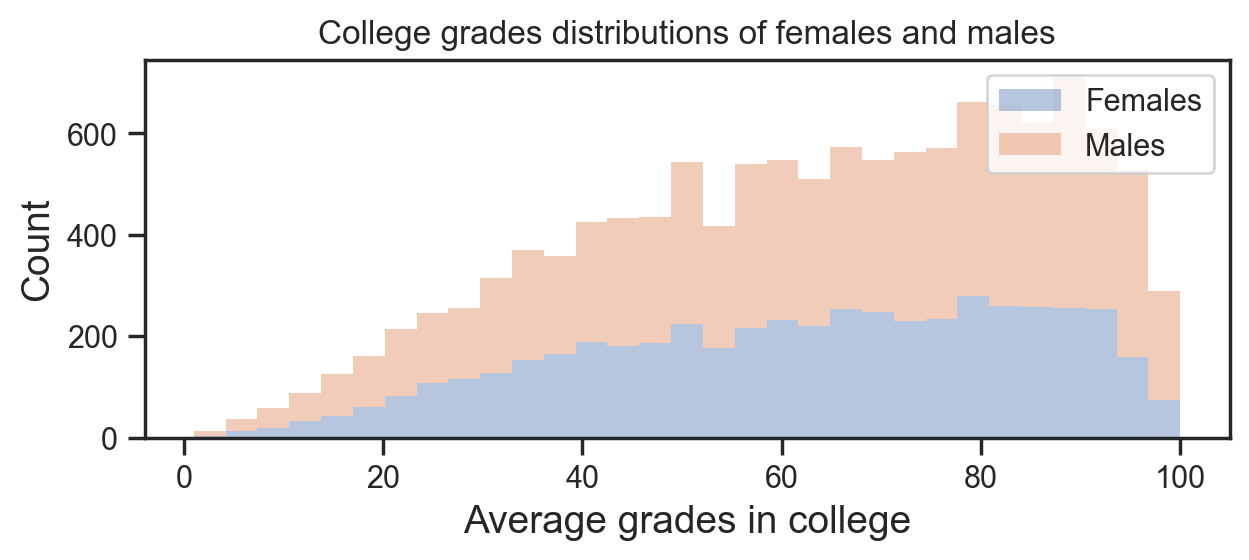

In [112]:
# plt.figure(figsize=(8,6))
sns.set(style='ticks')
men = df[df.GENDER=='M'][['GENDER','HI_GRADE_AVG']]
women = df[df.GENDER=='F'][['GENDER','HI_GRADE_AVG']]
fig,ax = plt.subplots()
plt.hist([women.HI_GRADE_AVG, men.HI_GRADE_AVG], 31, histtype='barstacked', density=False, alpha=0.4, edgecolor='none', label=['Females','Males'])

plt.xlabel("Average grades in highschool", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')


# Men and women college grades average histograms
# plt.figure(figsize=(8,6))
men = df[df.GENDER=='M'][['GENDER','COL_GRADE_AVG']]
women = df[df.GENDER=='F'][['GENDER','COL_GRADE_AVG']]
fig,ax = plt.subplots()
plt.hist([women.COL_GRADE_AVG, men.COL_GRADE_AVG], 31, histtype='barstacked', density=False, alpha=0.4, edgecolor='none', label=['Females','Males'])
#TODO legend added

plt.xlabel("Average grades in college", size=14)
plt.legend()
plt.ylabel("Count", size=14)
plt.title("College grades distributions of females and males")
plt.legend(loc='upper right')

## Highschool and college grades distributions by socio-economic levels

Vær opmærksom på, at disse ikke viser, hvor mange studerende, der er i hver gruppe. De viser frequnecy af karakterer i hver gruppe. 

In [113]:
df

,Unnamed: 0,GENDER,STRATUM,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin
0,0,F,Stratum_4,PRIVATE,ACADEMIC,71,81,61,86,82,71,93,71,93,79,85.666667,74.666667,1
1,1,F,Stratum_5,PRIVATE,ACADEMIC,83,75,66,100,88,97,38,86,98,78,74.000000,76.333333,1
2,2,M,Stratum_2,PRIVATE,ACADEMIC,52,49,38,46,42,17,1,18,43,22,20.666667,43.000000,0
3,3,F,Stratum_2,PRIVATE,ACADEMIC,56,55,51,64,73,65,35,76,80,48,63.666667,59.666667,1
4,4,M,Stratum_4,PRIVATE,ACADEMIC,80,65,76,85,92,94,94,98,100,71,97.333333,77.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,12406,M,Stratum_2,PRIVATE,ACADEMIC,67,69,70,67,81,88,71,86,87,65,81.333333,73.333333,0
12407,12407,M,Stratum_2,PUBLIC,ACADEMIC,58,57,61,63,53,46,39,44,11,0,31.333333,57.000000,0
12408,12408,M,Stratum_2,PRIVATE,ACADEMIC,66,69,75,70,58,98,88,90,81,87,86.333333,67.333333,0
12409,12409,F,Stratum_3,PRIVATE,ACADEMIC,53,69,64,59,52,60,80,51,8,42,46.333333,61.666667,1


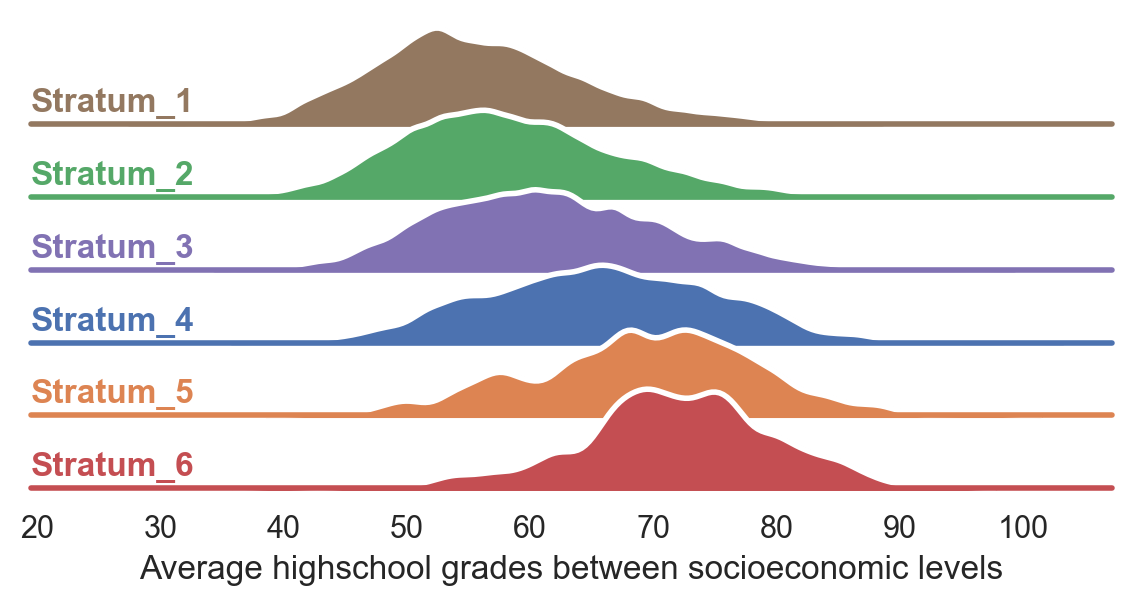

In [114]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# df = pd.read_csv("df_sum_score_ex.csv")
df = df[df.STRATUM!='0']

def Ridgeline_dists(df,x, metric="",plot_label=""):
    df_temp = df.copy()
    x = x 
    g = df_temp.STRATUM
    df_kat = pd.DataFrame(dict(x=x, g=g))
    df_kat_order = df_kat.groupby(["g"]).count()

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
    g = sns.FacetGrid(
        df_kat,
        row="g",
        hue="g",
        aspect=10,
        height=0.8,
        row_order = ['Stratum_1','Stratum_2','Stratum_3','Stratum_4','Stratum_5','Stratum_6'],
        # palette=pal # Denne gør den i de 2 blå farver
    )

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "x", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)#, order =['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=0.5)#,order=['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])
    g.map(plt.axhline, y=0, lw=2, clip_on=False)#, order=['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            0,
            0.2,
            label,
            fontweight="bold",
            color=color,
            ha="left",
            va="center",
            transform=ax.transAxes
        )

    g.map(label, "x")
    
    g.set_xlabels(plot_label)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-0.30)
    g.fig.set_size_inches(6, 3)
    

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    

Ridgeline_dists(df,x=df.HI_GRADE_AVG,plot_label='Average highschool grades between socioeconomic levels')
# Save as a SVG and PNG
plt.savefig("ridgeline_hi_STRATUM.png")

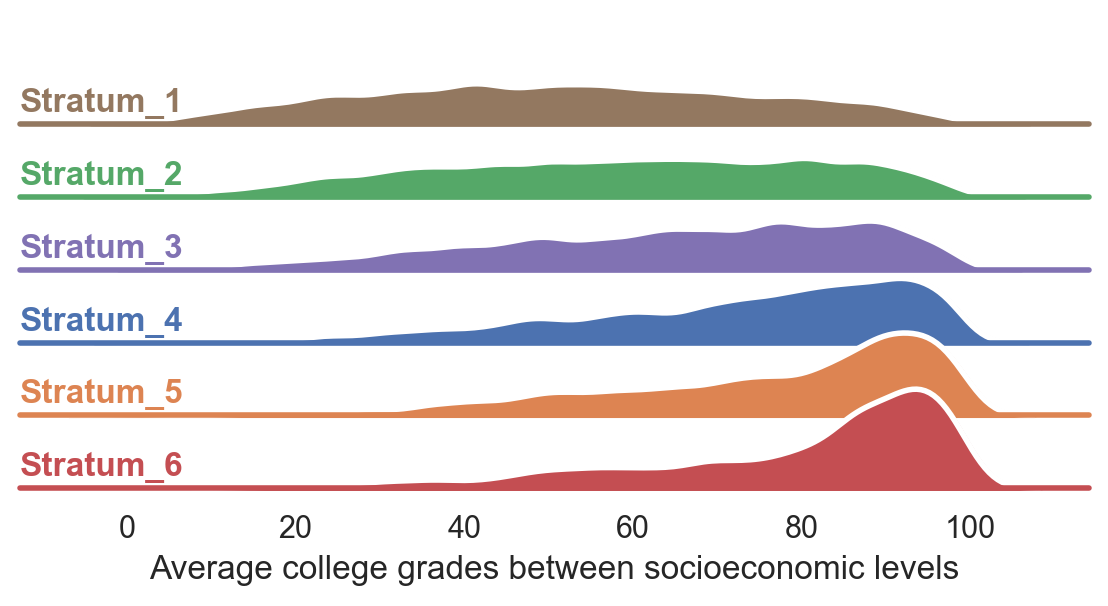

In [115]:
Ridgeline_dists(df,x=df.COL_GRADE_AVG,plot_label='Average college grades between socioeconomic levels')
# Save as a SVG and PNG
plt.savefig("ridgeline_col_STRATUM.png")

In [116]:
# pip install joypy

def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 20
    mpl.rcParams["figure.figsize"] = (10,7)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()


<Figure size 2000x1400 with 0 Axes>

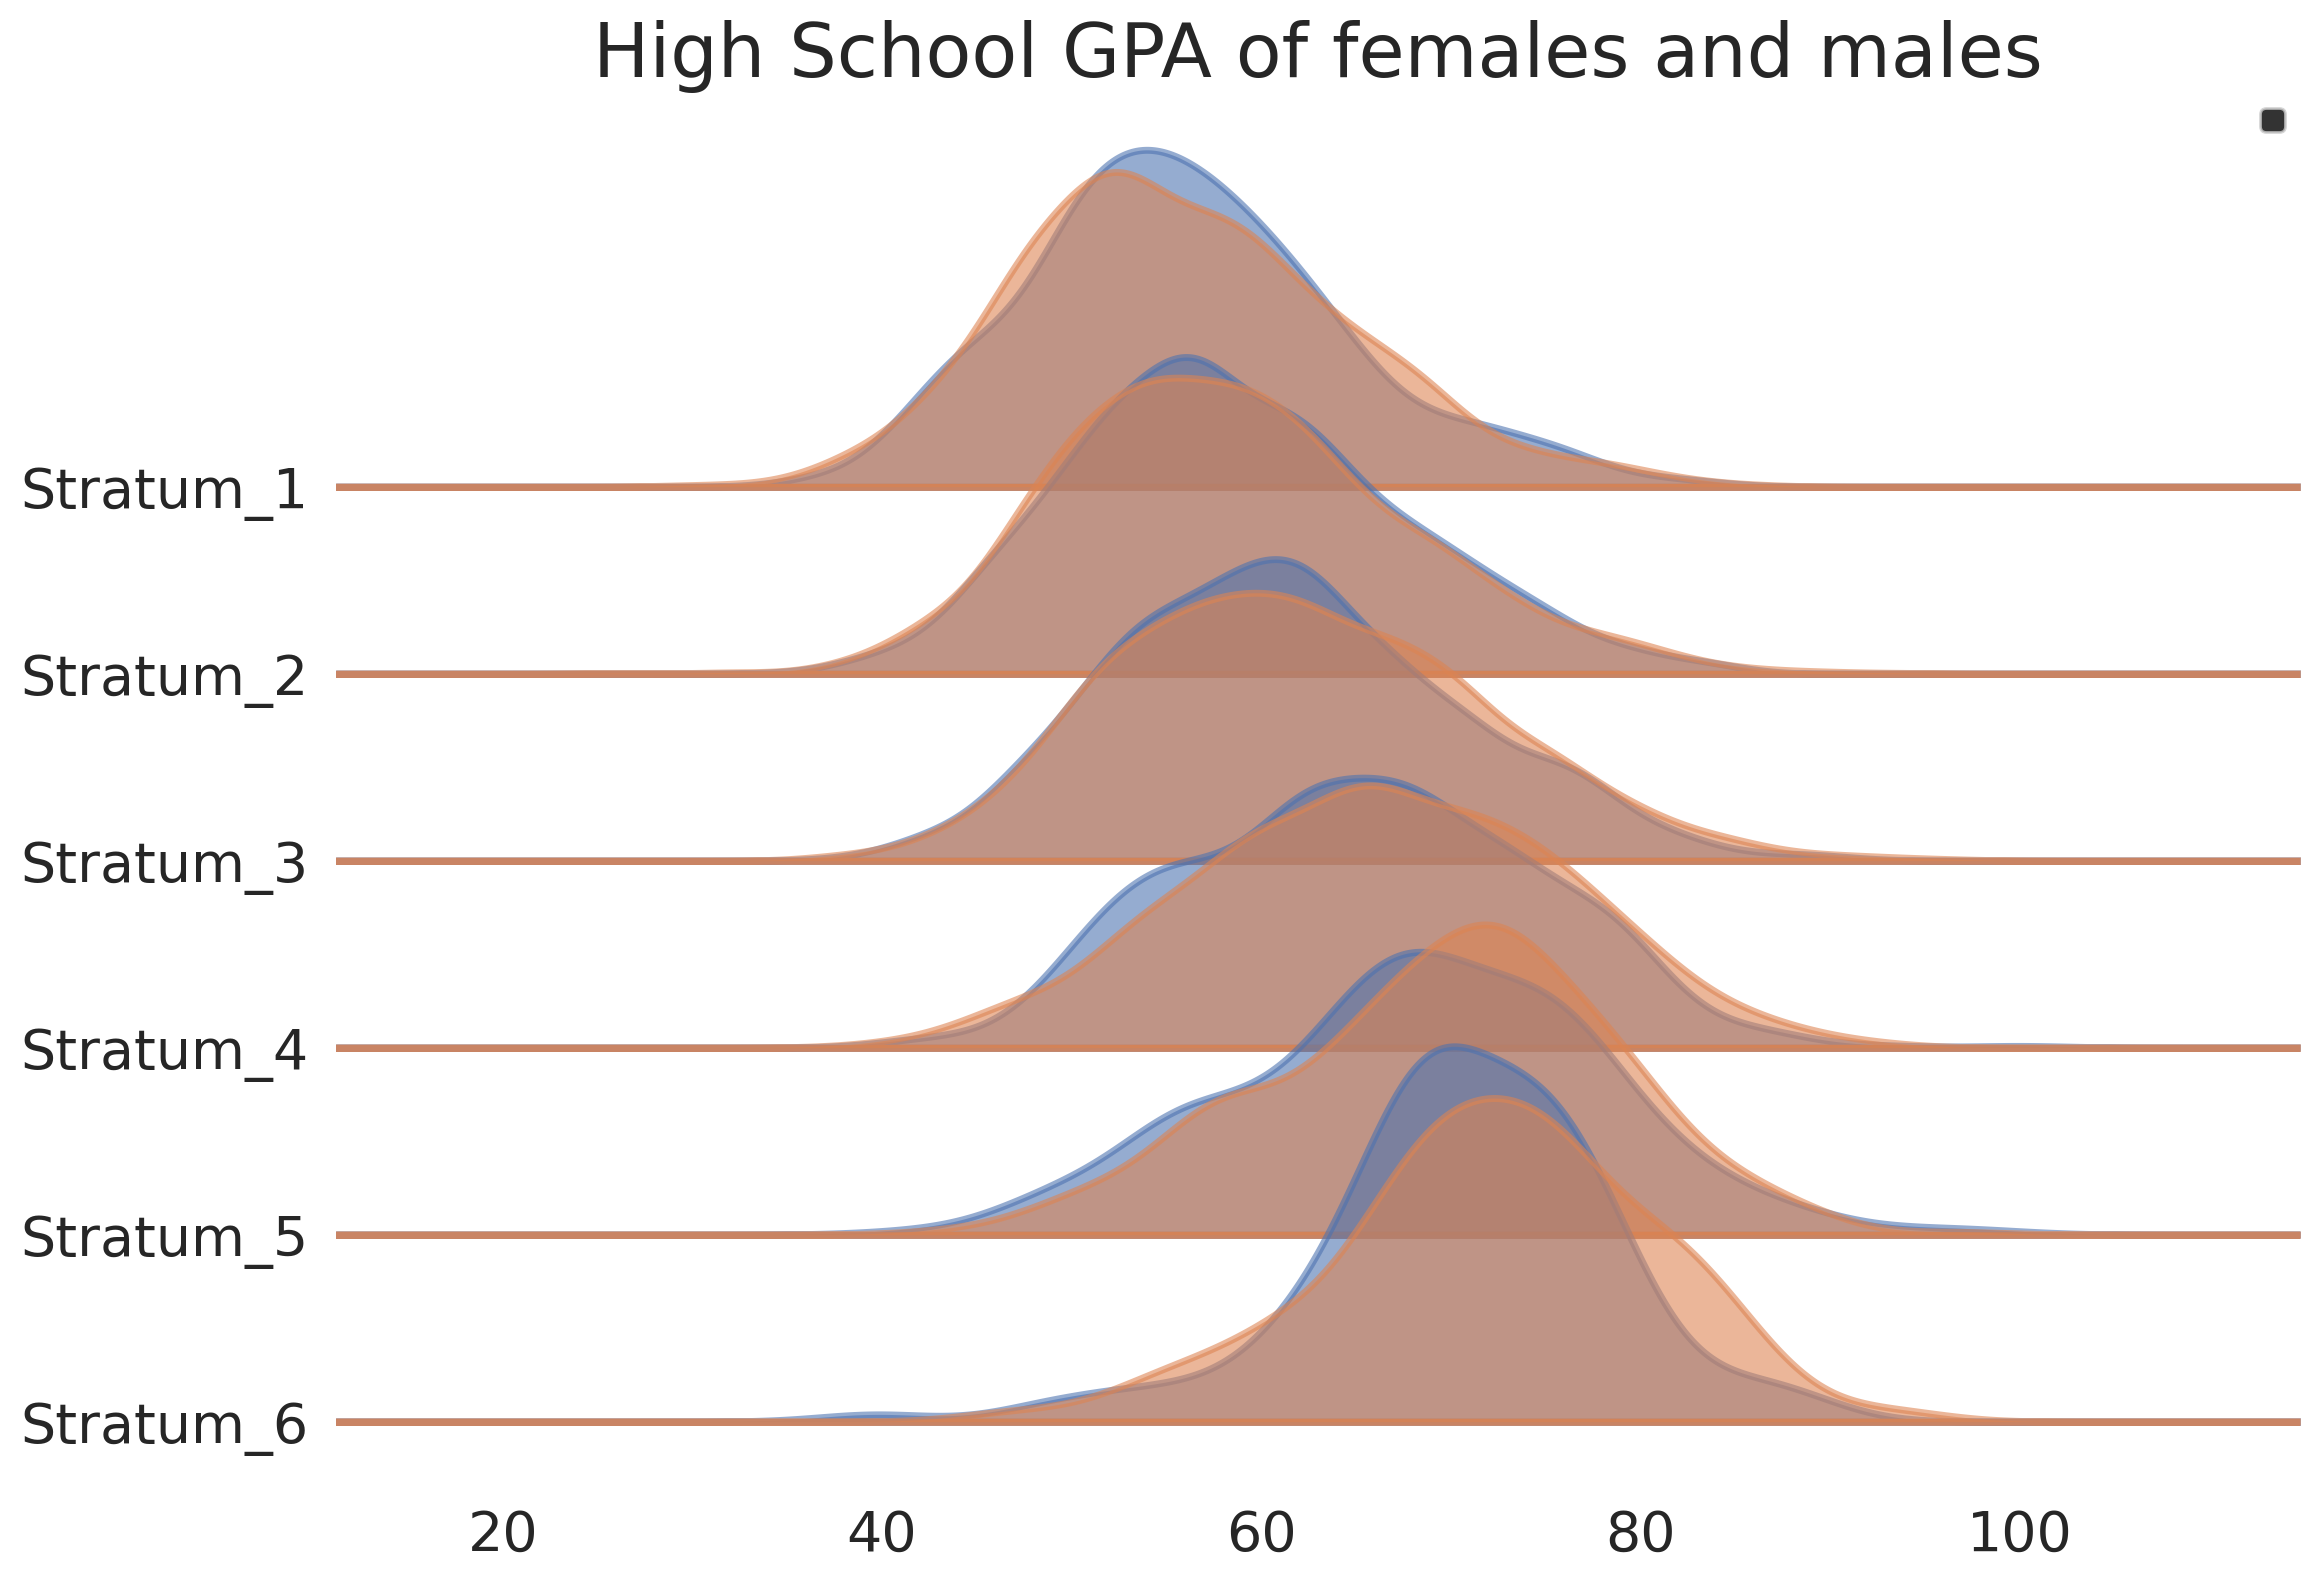

In [117]:
import pandas as pd
import joypy
from matplotlib import cm

# df = pd.read_csv("df_sum_score_ex.csv")
# df['Females'] = df[df['GENDER' == 'F']] 
df_temp = df.copy()
df_temp=df_temp[df_temp.STRATUM != '0']

df_M = df_temp[df_temp.GENDER_bin == 0]
df_F = df_temp[df_temp.GENDER_bin == 1]
HI_MEN = df_M.HI_GRADE_AVG 
HI_WOM = df_F.HI_GRADE_AVG 
df_temp['HI_WOM'] = HI_WOM
df_temp['HI_MEN'] = HI_MEN
df = df_temp

plt.figure()

ax, fig = joypy.joyplot(
    data=df[['HI_WOM', 'HI_MEN', 'STRATUM']], 
    by='STRATUM',
    column=['HI_WOM', 'HI_MEN'],
    fill=True, 
    linewidth=2.5, 
    # grid='both', 
    # figsize=(7,7),
    # color=['orange', '#eb4d4b'],
    # linewidth=1.5,
    # legend=True,
    alpha=0.59,
    linecolor='None',
    # colormap=cm.autumn,
    # Mode = True,
    figsize=(12, 8)
)
plt.legend(["Females",'Males'], loc ="upper right")

plt.title('High School GPA of females and males', fontsize=27)
plt.show()


<Figure size 2000x1400 with 0 Axes>

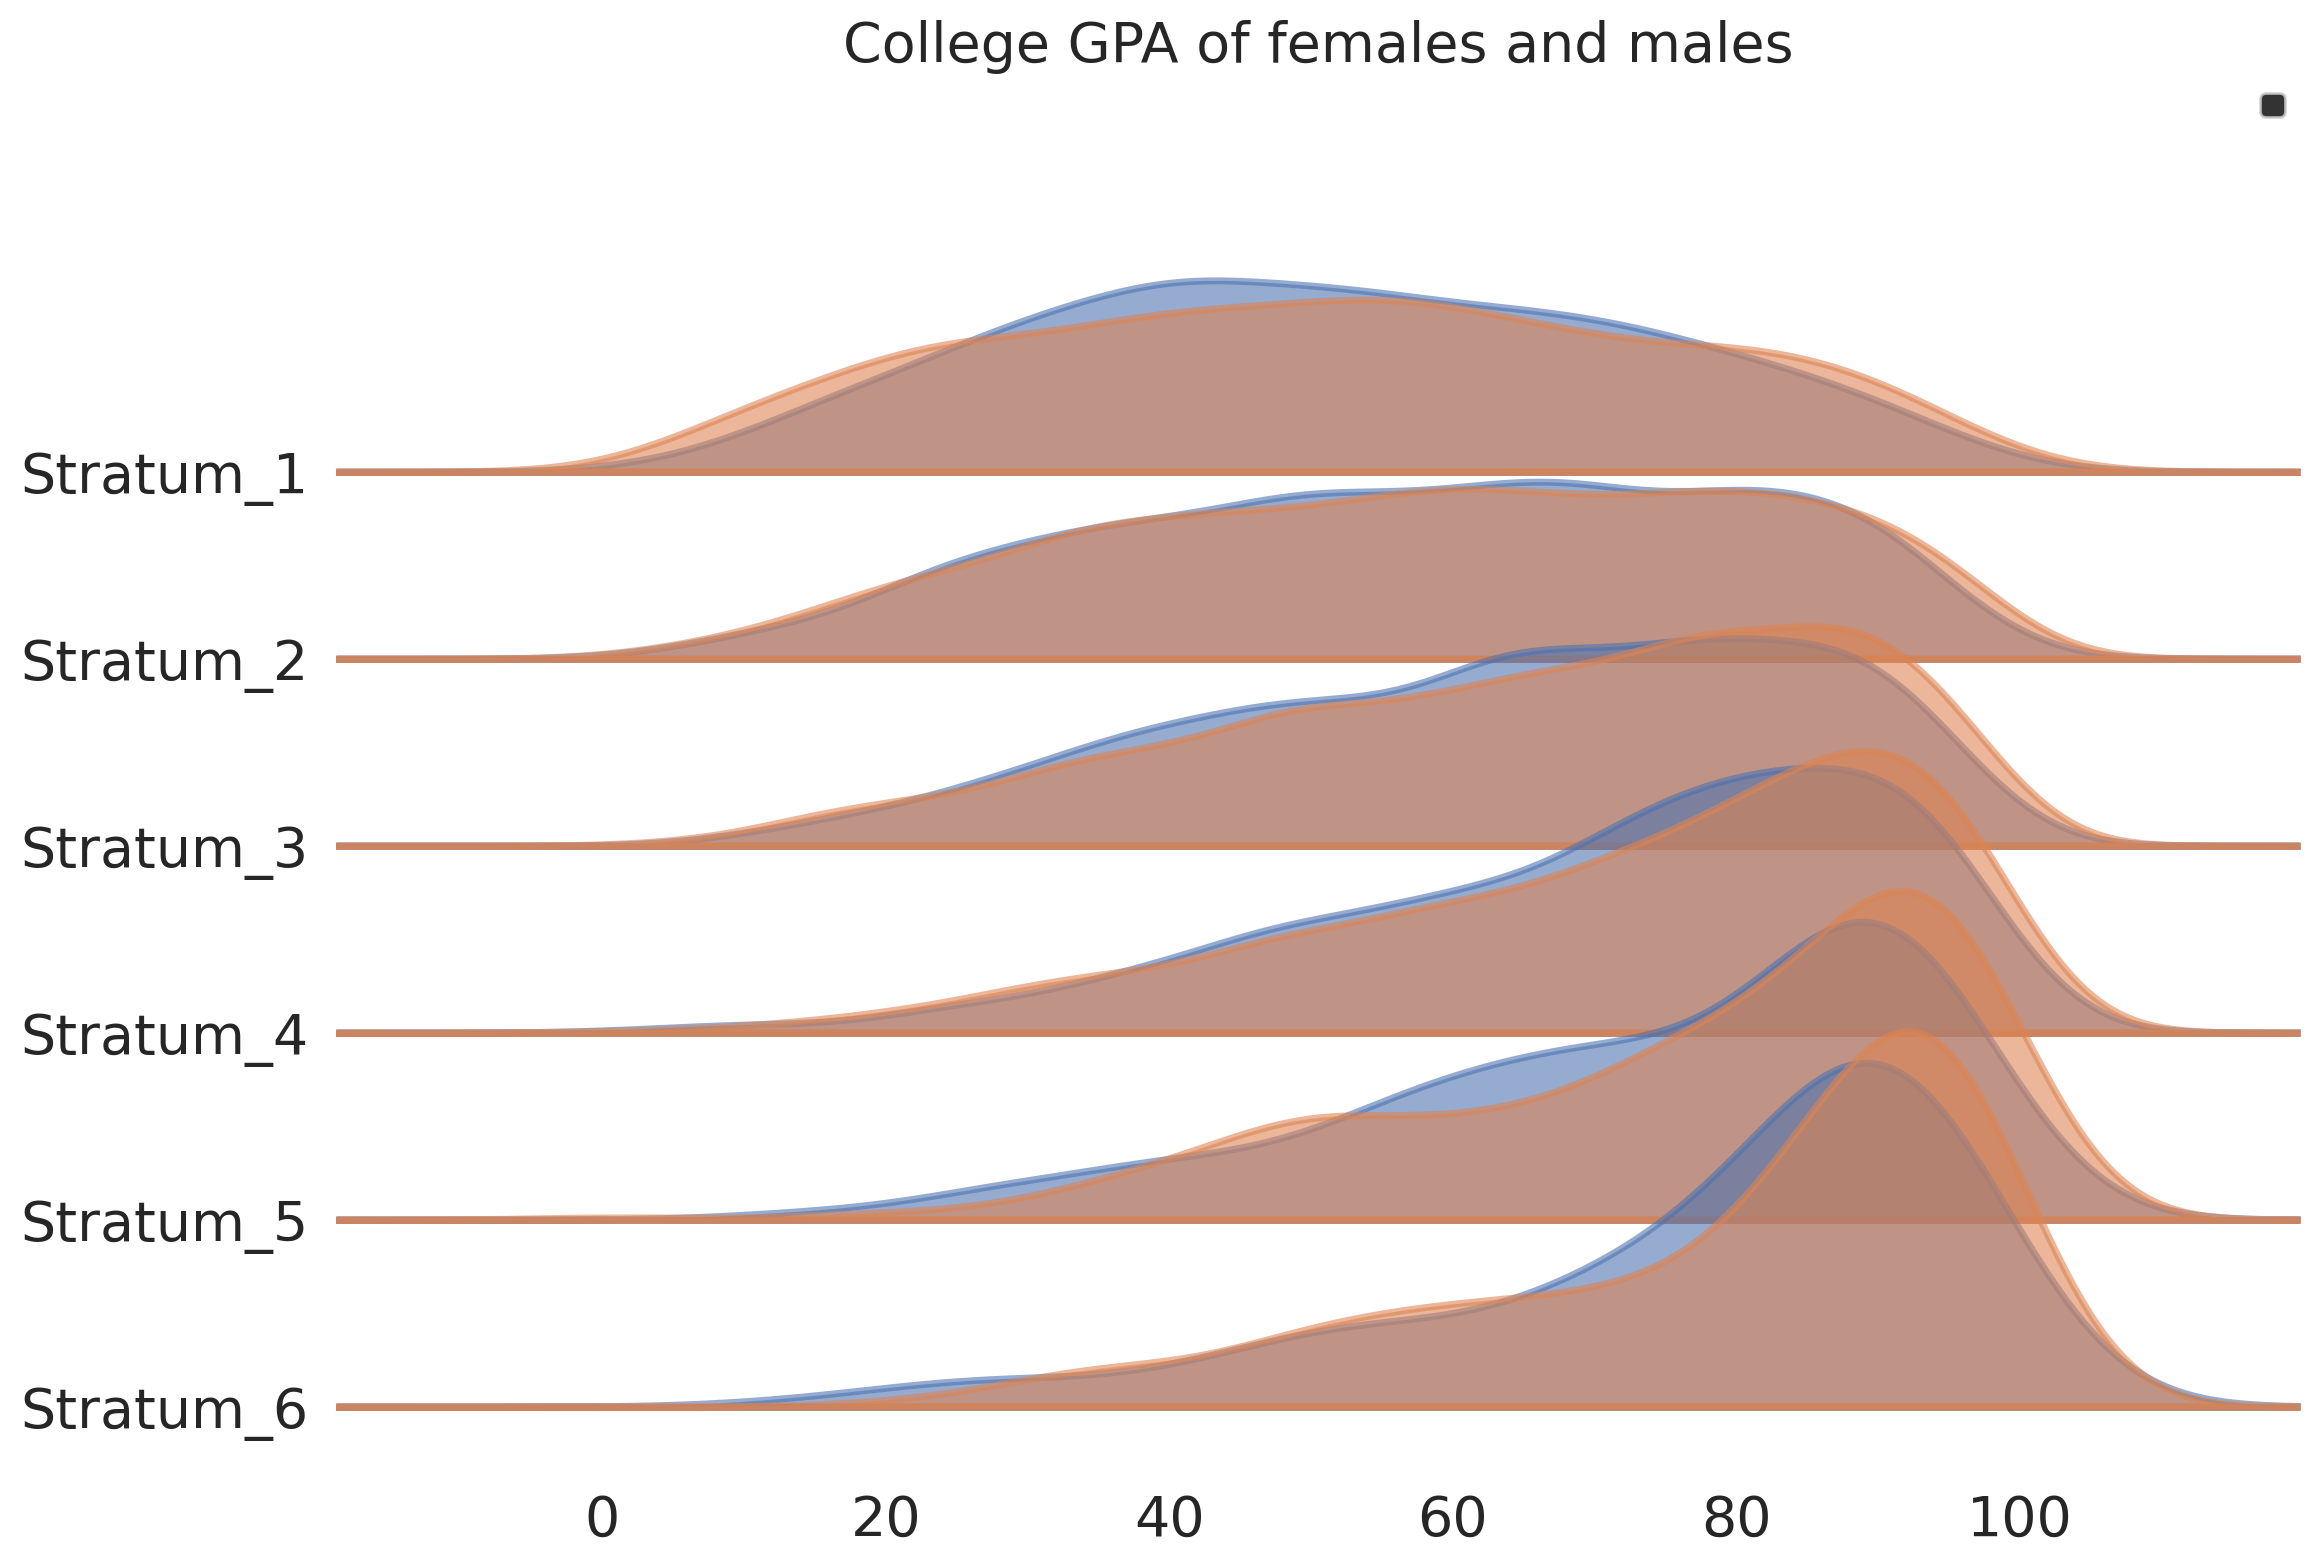

In [118]:
import pandas as pd
import joypy

# df = pd.read_csv("df_sum_score_ex.csv")
# df['Females'] = df[df['GENDER' == 'F']] 
df_temp = df.copy()
df_temp=df_temp[df_temp.STRATUM != '0']
df_M = df_temp[df_temp.GENDER_bin == 0]
df_F = df_temp[df_temp.GENDER_bin == 1]
HI_MEN = df_M.COL_GRADE_AVG 
HI_WOM = df_F.COL_GRADE_AVG 
df_temp['COL_WOM'] = HI_WOM
df_temp['COL_MEN'] = HI_MEN
df = df_temp

plt.figure()

ax, fig = joypy.joyplot(
    data=df[['COL_WOM', 'COL_MEN', 'STRATUM']], 
    by='STRATUM',
    column=['COL_WOM', 'COL_MEN'],
    fill=True, 
    linewidth=2.5, 
    # grid='both', 
    # figsize=(7,7),
    # color=['orange', '#eb4d4b'],
    # linewidth=1.5,
    # legend=True,
    alpha=0.59,
    linecolor='None',
    # colormap=cm.autumn,
    # Mode = True,
    figsize=(12, 8)
)
plt.legend(["Females",'Males'], loc ="upper right")

plt.title('College GPA of females and males', fontsize=20)
plt.show()


## Distribution of grades by gender & socio-economic level (before and after college)

In [119]:
# Create subset of dataframe to use for plot
df = df.copy()
# df = df_norm.copy()
# df = df_stand.copy()

df_gen_soc_hc = df[['HI_GRADE_AVG', 'COL_GRADE_AVG', 'GENDER', 'STRATUM']]

# Columns are renamed to use in plot
df_gen_soc_hc = df_gen_soc_hc.rename(columns = {"HI_GRADE_AVG":"HI", "COL_GRADE_AVG":"COL"})

In [120]:
# Create dataframe with one column of both "HI" and "COL" and another column with respective average HI or COL grade
 # There will be 2*rows of the original df as there will be a "HI" and "COL" for each candidate
df_try = pd.melt(df_gen_soc_hc, id_vars=['GENDER', 'STRATUM']) 
df_try = df_try.rename(columns={"variable":"Average_grade"}) # rename columns to use for plot

#Show dataframe used for plotting
df_try

,GENDER,STRATUM,Average_grade,value
0,F,Stratum_4,HI,74.666667
1,F,Stratum_5,HI,76.333333
2,M,Stratum_2,HI,43.000000
3,F,Stratum_2,HI,59.666667
4,M,Stratum_4,HI,77.666667
...,...,...,...,...
24789,M,Stratum_2,COL,81.333333
24790,M,Stratum_2,COL,31.333333
24791,M,Stratum_2,COL,86.333333
24792,F,Stratum_3,COL,46.333333


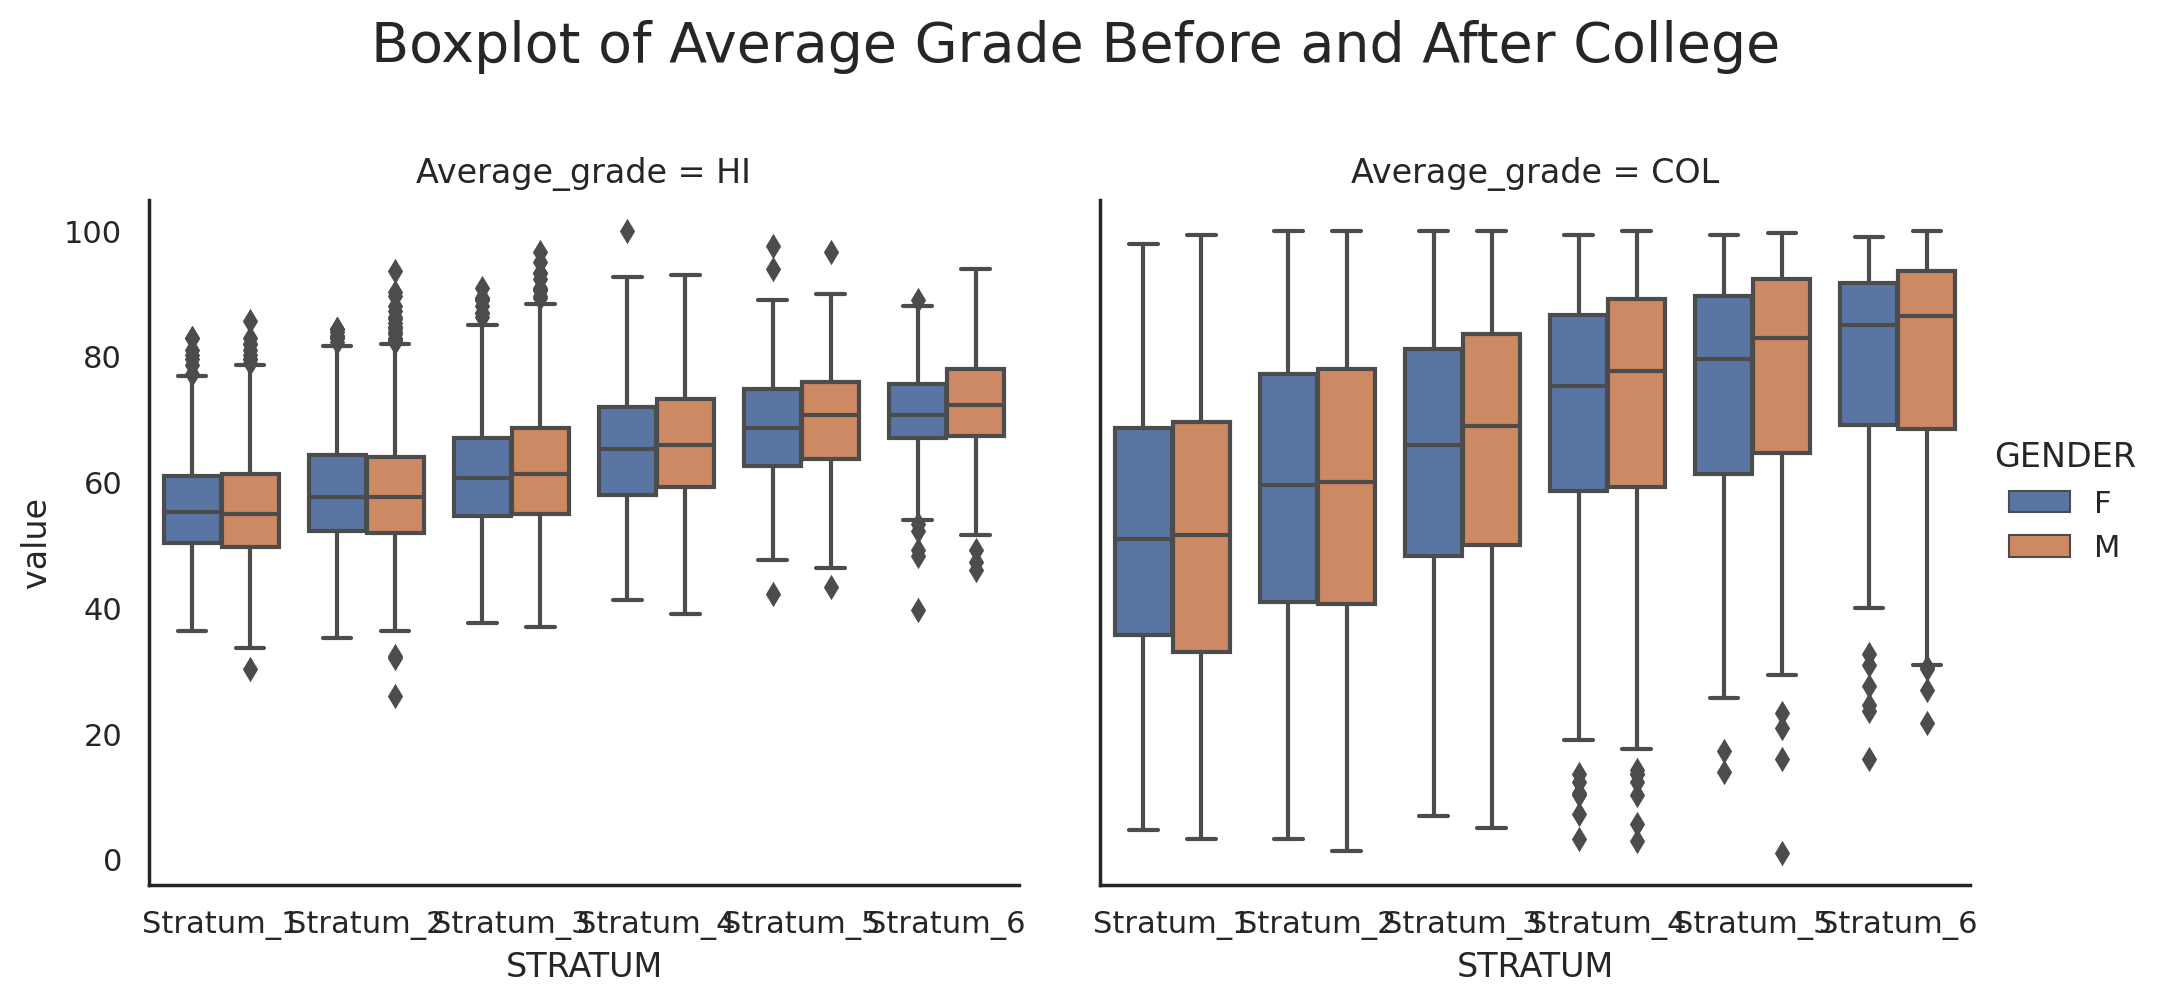

In [121]:
#Plot grouped boxplot of Males and Females, per stratum, in two figures for before college and after college.
b = sns.catplot(data=df_try, x='STRATUM', y='value', 
               hue='GENDER', col='Average_grade',
               kind='box', legend=True, order=["Stratum_1", "Stratum_2", "Stratum_3", "Stratum_4", "Stratum_5", "Stratum_6"])

b.fig.subplots_adjust(top=.8)
b.fig.suptitle('Boxplot of Average Grade Before and After College', size=20)

#plt.xlabel(" ")

# Save as a SVG and PNG
plt.savefig("box_plot_gender_STRATUM.png")
plt.show()


In [122]:
df_try

,GENDER,STRATUM,Average_grade,value
0,F,Stratum_4,HI,74.666667
1,F,Stratum_5,HI,76.333333
2,M,Stratum_2,HI,43.000000
3,F,Stratum_2,HI,59.666667
4,M,Stratum_4,HI,77.666667
...,...,...,...,...
24789,M,Stratum_2,COL,81.333333
24790,M,Stratum_2,COL,31.333333
24791,M,Stratum_2,COL,86.333333
24792,F,Stratum_3,COL,46.333333


In [129]:
df_try.groupby(['STRATUM','Average_grade']).agg(['mean', 'median', 'std', 'count'])


value                            
                              mean     median        std count
STRATUM   Average_grade                                       
Stratum_1 COL            51.798908  51.333333  22.630515  1709
          HI             55.926078  55.000000   8.561608  1709
Stratum_2 COL            58.575412  60.000000  22.645091  4029
          HI             58.515678  57.666667   8.887819  4029
Stratum_3 COL            64.876391  68.000000  21.404350  4045
          HI             61.719819  61.000000   9.327792  4045
Stratum_4 COL            72.111534  77.000000  20.060177  1578
          HI             65.820659  66.000000   9.483840  1578
Stratum_5 COL            75.994207  81.666667  19.150428   633
          HI             69.133228  69.666667   9.164268   633
Stratum_6 COL            79.097601  86.000000  18.389222   403
          HI             71.687345  72.000000   8.285359   403

In [128]:
df_try.groupby(['GENDER','Average_grade']).agg(['mean', 'median', 'std', 'count'])


value                            
                           mean     median        std count
GENDER Average_grade                                       
F      COL            62.164979  64.666667  22.135066  5037
       HI             60.775462  60.000000   9.516014  5037
M      COL            63.532246  66.333333  23.232966  7360
       HI             61.329393  60.666667  10.137025  7360

In [127]:
df_try.groupby(['STRATUM']).agg(['mean', 'median', 'std', 'count'])


value                            
                mean     median        std count
STRATUM                                         
Stratum_1  53.862493  54.333333  17.230630  3418
Stratum_2  58.545545  58.333333  17.200608  8058
Stratum_3  63.298105  63.000000  16.584166  8090
Stratum_4  68.966096  69.000000  15.999871  3156
Stratum_5  72.563718  72.666667  15.393530  1266
Stratum_6  75.392473  75.333333  14.727446   806

## T-test

- t-test for high school GPA distributions of men and women
- kruskals willis for college GPA distributions of men and women


- Anova for stratum gender 


In [6]:
df

,Unnamed: 0,GENDER,STRATUM,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin
0,0,F,Stratum_4,PRIVATE,ACADEMIC,71,81,61,86,82,71,93,71,93,79,85.666667,74.666667,1
1,1,F,Stratum_5,PRIVATE,ACADEMIC,83,75,66,100,88,97,38,86,98,78,74.000000,76.333333,1
2,2,M,Stratum_2,PRIVATE,ACADEMIC,52,49,38,46,42,17,1,18,43,22,20.666667,43.000000,0
3,3,F,Stratum_2,PRIVATE,ACADEMIC,56,55,51,64,73,65,35,76,80,48,63.666667,59.666667,1
4,4,M,Stratum_4,PRIVATE,ACADEMIC,80,65,76,85,92,94,94,98,100,71,97.333333,77.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,12406,M,Stratum_2,PRIVATE,ACADEMIC,67,69,70,67,81,88,71,86,87,65,81.333333,73.333333,0
12407,12407,M,Stratum_2,PUBLIC,ACADEMIC,58,57,61,63,53,46,39,44,11,0,31.333333,57.000000,0
12408,12408,M,Stratum_2,PRIVATE,ACADEMIC,66,69,75,70,58,98,88,90,81,87,86.333333,67.333333,0
12409,12409,F,Stratum_3,PRIVATE,ACADEMIC,53,69,64,59,52,60,80,51,8,42,46.333333,61.666667,1


In [7]:
from scipy.stats import ttest_ind

df_temp = df.copy()
AvgMal = df_temp[df_temp.GENDER_bin == 0]
male = AvgMal.HI_GRADE_AVG

AvgFem = df_temp[df_temp.GENDER_bin == 1]
female = AvgFem.HI_GRADE_AVG
print(ttest_ind(female, male))

Ttest_indResult(statistic=-3.0630350067852383, pvalue=0.0021957433564993157)


In [8]:
from scipy.stats import ttest_ind
# ttest_ind(df.groupby('STRATUM')['HI_GRADE_AVG'].apply(lambda x:list(x)))

stra1 = df[df['STRATUM']=='Stratum_1']
stra2 = df[df['STRATUM']=='Stratum_2']
stra3 = df[df['STRATUM']=='Stratum_3']
stra4 = df[df['STRATUM']=='Stratum_4']
stra5 = df[df['STRATUM']=='Stratum_5']
stra6 = df[df['STRATUM']=='Stratum_6']



# ttest_ind(stra2['HI_GRADE_AVG'], stra4['HI_GRADE_AVG'])
print(ttest_ind(stra1['HI_GRADE_AVG'], stra2['HI_GRADE_AVG']))
print(ttest_ind(stra2['HI_GRADE_AVG'], stra3['HI_GRADE_AVG']))
print(ttest_ind(stra3['HI_GRADE_AVG'], stra4['HI_GRADE_AVG']))
print(ttest_ind(stra1['HI_GRADE_AVG'], stra6['HI_GRADE_AVG']))



Ttest_indResult(statistic=-10.203213194949857, pvalue=3.0865792785993116e-24)
Ttest_indResult(statistic=-15.80024892458184, pvalue=2.085523302043475e-55)
Ttest_indResult(statistic=-14.74269869912169, pvalue=2.7094427445226195e-48)
Ttest_indResult(statistic=-33.44684166241017, pvalue=3.668921113150816e-197)


**Kruskal Wallis:** The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. 

In [12]:
from scipy import stats

#HIGH SCHOOL
df_temp = df.copy()
AvgMal = df_temp[df_temp.GENDER_bin == 0]
male = AvgMal.HI_GRADE_AVG

AvgFem = df_temp[df_temp.GENDER_bin == 1]
female = AvgFem.HI_GRADE_AVG
print("high school kruskal-wallis: ",stats.kruskal(female, male))


#COLLEGE
df_temp = df.copy()
AvgMal = df_temp[df_temp.GENDER_bin == 0]
male = AvgMal.COL_GRADE_AVG

AvgFem = df_temp[df_temp.GENDER_bin == 1]
female = AvgFem.COL_GRADE_AVG
print("college kruskal-wallis: ",stats.kruskal(female, male))

high school kruskal-wallis:  KruskalResult(statistic=6.903725886302766, pvalue=0.008601630265324685)
college kruskal-wallis:  KruskalResult(statistic=16.53383040828134, pvalue=4.778976188697544e-05)


###  Correlation matrix showing the correlation between grades before vs after college

In [124]:
# Dataframe to use for correlation of HI and COL grades
df_corr_HI_COL = df_gen_soc_hc.copy()

In [125]:
sns.heatmap(df_use[["HI", "COL"]].corr(method="pearson"), vmin=0.0, vmax=1.0, annot = True);

NameError: name 'df_use' is not defined

### Correlation matrix showing the (Pearson) correlation between grades (before), grades (after), gender, socio-economic level